STOCK MARKET ANALYSIS 

In [38]:
## importing the libraries 

In [39]:
import warnings

In [40]:
warnings.filterwarnings('ignore')

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 50
sns.set_style('darkgrid')


In [42]:
data = pd.read_csv('C:\\Users\\asus\\Downloads\\stock_market_dataset.csv',parse_dates=["Date"], index_col="Date")
data.head()


,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-03-01,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
2000-04-01,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2000-05-01,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
2000-06-01,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
2000-07-01,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


In [43]:
## data cleaning

In [44]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Turnover     0
P/E          0
P/B          0
Div Yield    0
dtype: int64

In [45]:
data.interpolate(method='time', inplace=True)

In [46]:
data

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-03-01,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,25.91,4.63,0.95
2000-04-01,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92
2000-05-01,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95
2000-06-01,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94
2000-07-01,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94
...,...,...,...,...,...,...,...,...,...
2021-01-07,15755.05,15755.55,15667.05,15680.00,224921644,1.736000e+11,28.26,4.23,1.27
2021-02-07,15705.85,15738.35,15635.95,15722.20,254808999,1.801540e+11,28.33,4.24,1.23
2021-05-07,15793.40,15845.95,15762.05,15834.35,207032153,1.497650e+11,28.53,4.27,1.23


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5353 entries, 2000-03-01 to 2021-07-07
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5353 non-null   float64
 1   High       5353 non-null   float64
 2   Low        5353 non-null   float64
 3   Close      5353 non-null   float64
 4   Volume     5353 non-null   int64  
 5   Turnover   5353 non-null   float64
 6   P/E        5353 non-null   float64
 7   P/B        5353 non-null   float64
 8   Div Yield  5353 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 418.2 KB


In [48]:
data.describe()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
count,5353.000000,5353.000000,5353.000000,5353.000000,5.353000e+03,5.353000e+03,5353.000000,5353.000000,5353.000000
mean,5639.363544,5676.576051,5594.238492,5636.173632,1.899654e+08,8.291270e+10,20.725849,3.553936,1.419139
std,3669.035585,3680.710632,3647.608681,3664.431037,1.733588e+08,8.291997e+10,5.137248,0.788623,0.395986
min,853.000000,877.000000,849.950000,854.200000,1.394931e+06,4.012000e+08,10.680000,1.920000,0.590000
25%,2080.000000,2098.000000,2062.550000,2080.500000,8.129548e+07,3.157850e+10,17.300000,3.040000,1.170000
50%,5233.650000,5277.250000,5196.350000,5232.200000,1.426366e+08,6.107780e+10,20.380000,3.470000,1.330000
75%,8331.850000,8376.750000,8273.350000,8328.350000,2.167622e+08,9.273390e+10,23.430000,3.820000,1.540000
max,15915.350000,15915.650000,15842.400000,15879.650000,1.811564e+09,7.852290e+11,42.000000,6.550000,3.180000


In [49]:
np.unique

<function numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)>

In [50]:
df=pd.DataFrame(data)
display(df.drop_duplicates())

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-03-01,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,25.91,4.63,0.95
2000-04-01,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92
2000-05-01,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95
2000-06-01,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94
2000-07-01,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94
...,...,...,...,...,...,...,...,...,...
2021-01-07,15755.05,15755.55,15667.05,15680.00,224921644,1.736000e+11,28.26,4.23,1.27
2021-02-07,15705.85,15738.35,15635.95,15722.20,254808999,1.801540e+11,28.33,4.24,1.23
2021-05-07,15793.40,15845.95,15762.05,15834.35,207032153,1.497650e+11,28.53,4.27,1.23


In [51]:
## as can be seen no outliers , no missing or null values and duplicates

DATA ANALYSIS 

<AxesSubplot:xlabel='Date'>

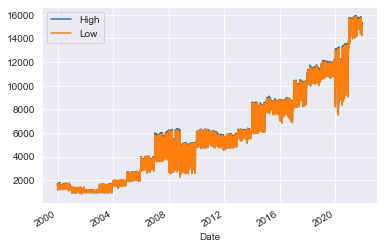

In [53]:
data[['High', 'Low']].plot()


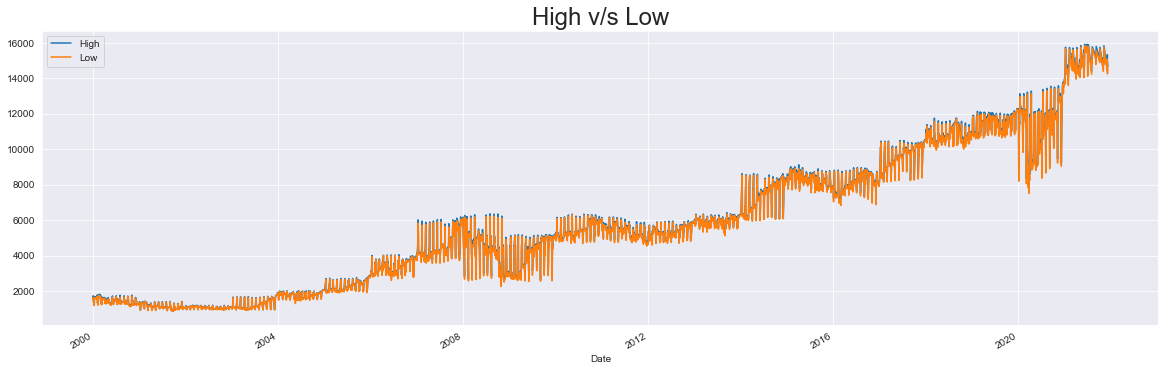

In [54]:
ax = data[['High', 'Low']].plot(figsize=(20, 6))
ax.set_title('High v/s Low', fontsize=24);


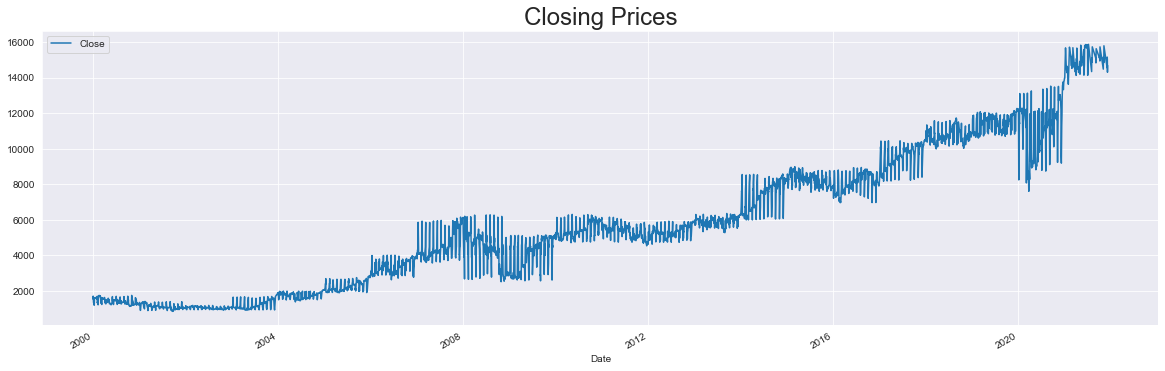

In [55]:
ax = data[['Close']].plot(figsize=(20, 6))
ax.set_title('Closing Prices', fontsize=24);

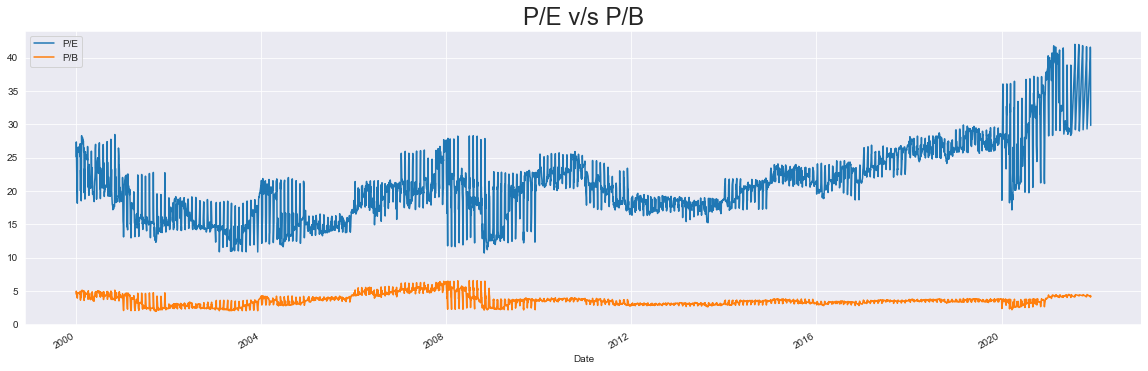

In [56]:
ax = data[['P/E', 'P/B']].plot(figsize=(20, 6))
ax.set_title('P/E v/s P/B', fontsize=24);

In [57]:
## market performance 2019 

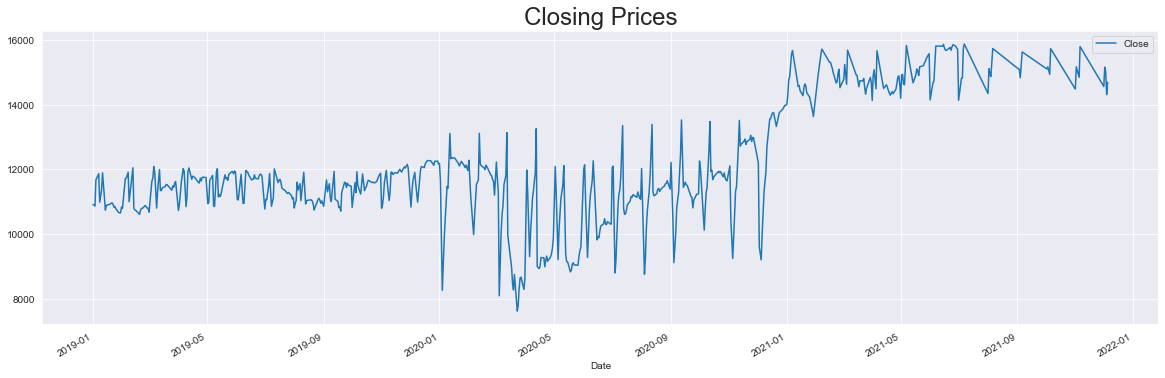

In [58]:
ax = data[['Close']]['2019':].plot(figsize=(20, 6))
ax.set_title('Closing Prices', fontsize=24);

In [59]:
nifty_auto = pd.read_csv('C:\\Users\\asus\\Downloads\\NIFTY AUTO.csv',parse_dates=["Date"], index_col="Date")
nifty_bank = pd.read_csv('C:\\Users\\asus\\Downloads\\NIFTY BANK.csv',parse_dates=["Date"], index_col="Date")
nifty_fmcg = pd.read_csv('C:\\Users\\asus\\Downloads\\NIFTY FMCG.csv',parse_dates=["Date"], index_col="Date")
nifty_IT = pd.read_csv('C:\\Users\\asus\\Downloads\\NIFTY IT.csv',parse_dates=["Date"], index_col="Date")
nifty_metal = pd.read_csv('C:\\Users\\asus\\Downloads\\NIFTY METAL.csv',parse_dates=["Date"], index_col="Date")
nifty_pharma = pd.read_csv('C:\\Users\\asus\\Downloads\\NIFTY PHARMA.csv',parse_dates=["Date"], index_col="Date")


nifty_auto.interpolate(method='time', inplace=True)
nifty_bank.interpolate(method='time', inplace=True)
nifty_fmcg.interpolate(method='time', inplace=True)
nifty_IT.interpolate(method='time', inplace=True)
nifty_metal.interpolate(method='time', inplace=True)
nifty_pharma.interpolate(method='time', inplace=True)

df = pd.DataFrame({
    'NIFTY Auto index': nifty_auto['Close']['2020':].values, 
    'NIFTY Bank index': nifty_bank['Close']['2020':].values,
    'NIFTY FMCG index': nifty_fmcg['Close']['2020':].values,
    'NIFTY IT index': nifty_IT['Close']['2020':].values,
    'NIFTY Metal index': nifty_metal['Close']['2020':].values,
    'NIFTY Pharma index': nifty_pharma['Close']['2020':].values,
})

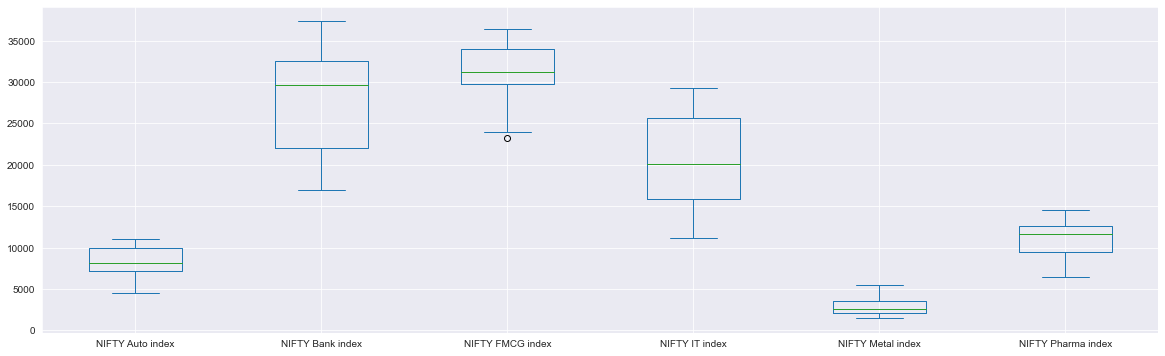

In [60]:
ax = df.plot.box(figsize=(20, 6))

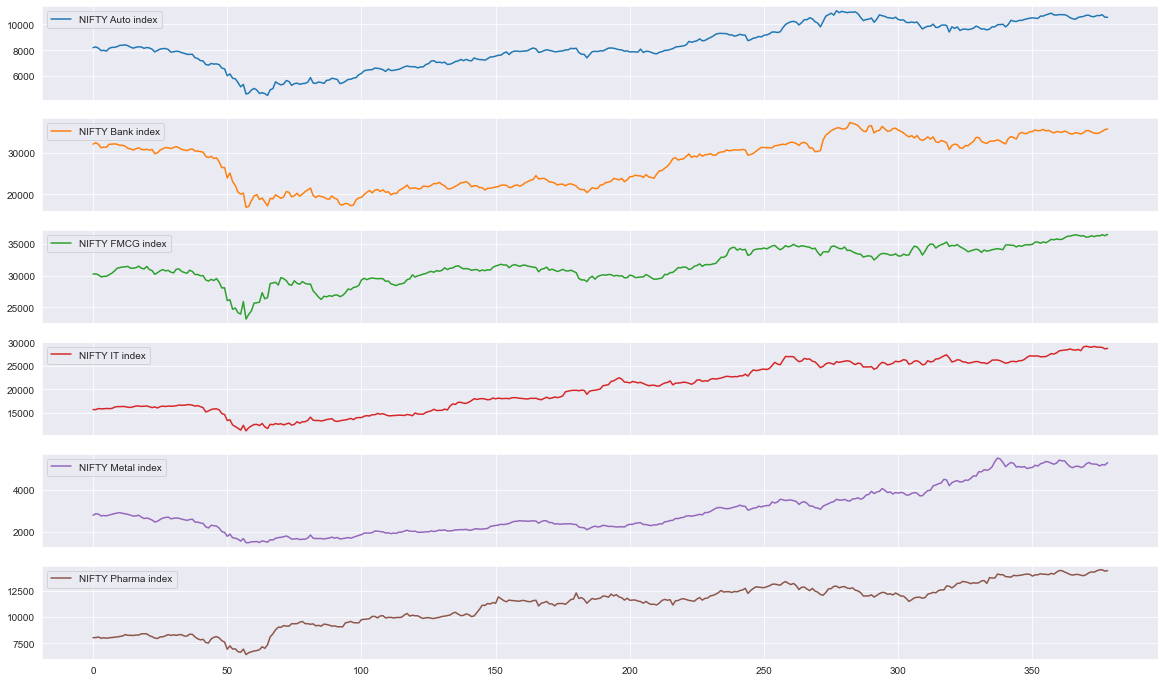

In [61]:
ax = df.plot(subplots=True, figsize=(20, 12))

In [75]:
data = pd.read_csv("C:\\Users\\asus\\Downloads\\stock_data_2.csv", parse_dates=['Date'], index_col='Date', usecols=['Date', 'Open','High','Low','Close','Volume','VWAP'])
print(data.shape)
data.head()

(5306, 6)


,Open,High,Low,Close,VWAP,Volume
Date,,,,,,
2000-03-01,237.50,251.70,237.50,251.70,249.37,4456424
2000-04-01,258.40,271.85,251.30,271.85,263.52,9487878
2000-05-01,256.65,287.90,256.65,282.50,274.79,26833684
2000-06-01,289.00,300.70,289.00,294.35,295.45,15682286
2000-07-01,295.00,317.90,293.00,314.55,308.91,19870977


In [76]:
data.tail()

,Open,High,Low,Close,VWAP,Volume
Date,,,,,,
2021-04-26,1920.00,1962.0,1911.50,1937.85,1941.32,9620785
2021-04-27,1940.00,1997.2,1938.25,1988.65,1978.64,9226547
2021-04-28,1997.85,2008.0,1980.15,1997.30,1997.60,7902002
2021-04-29,2022.90,2044.5,2007.30,2024.05,2024.21,8035915
2021-04-30,2008.50,2036.0,1987.55,1994.50,2010.20,9150974


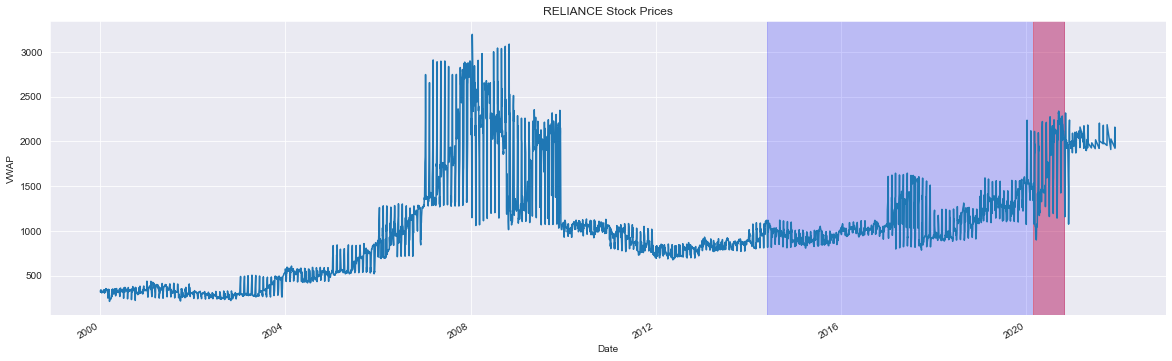

In [77]:
ax = data['VWAP'].plot(figsize=(20,6))
ax.set_title('RELIANCE Stock Prices')
ax.axvspan('2014-06-01','2020-10-30', color='blue', alpha=0.2) # Modi Govt
ax.axvspan('2020-03-01','2020-10-30', color='red', alpha=0.3) # Covid Pandemic
ax.set_ylabel('VWAP');


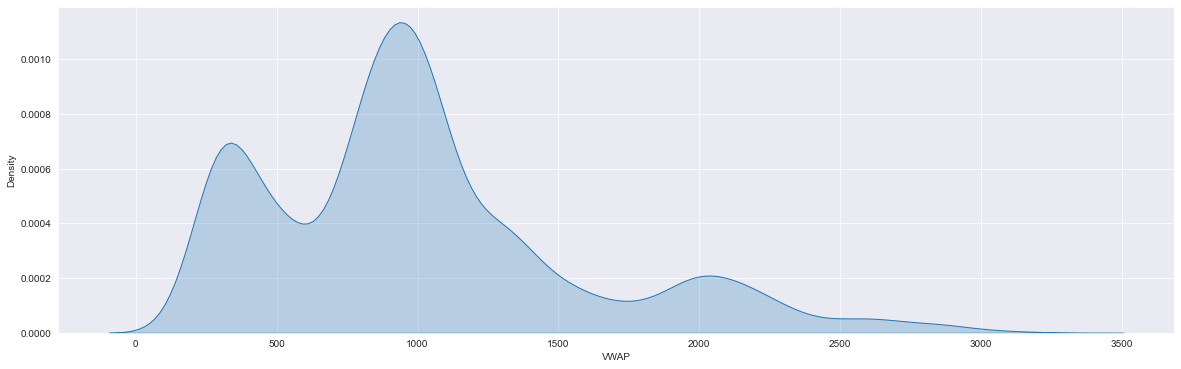

In [78]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.kdeplot(data['VWAP'],shade=True, ax=ax);


Resampling and missing tretament

In [79]:
data = data.resample('D').mean()
data.isnull().sum()

Open      2702
High      2702
Low       2702
Close     2702
VWAP      2702
Volume    2702
dtype: int64

In [80]:
data.interpolate(method='time', inplace=True)

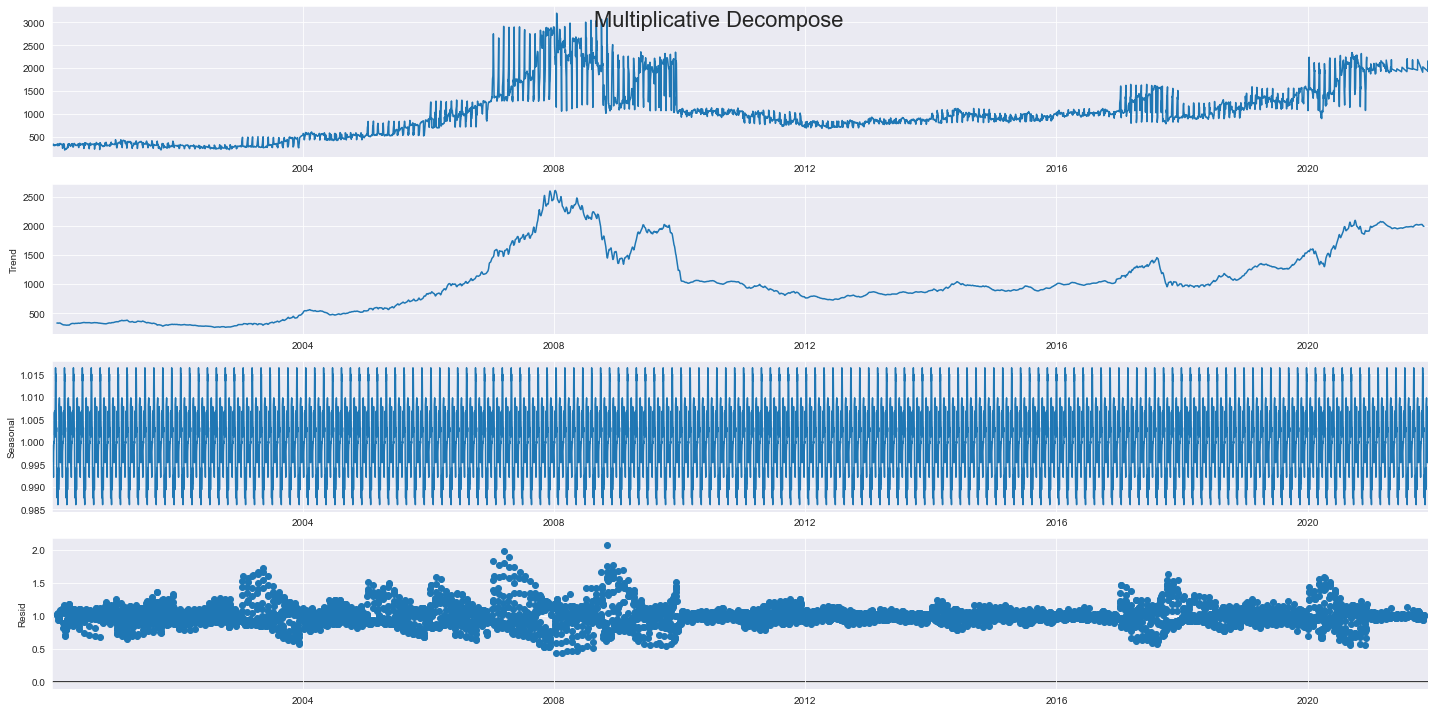

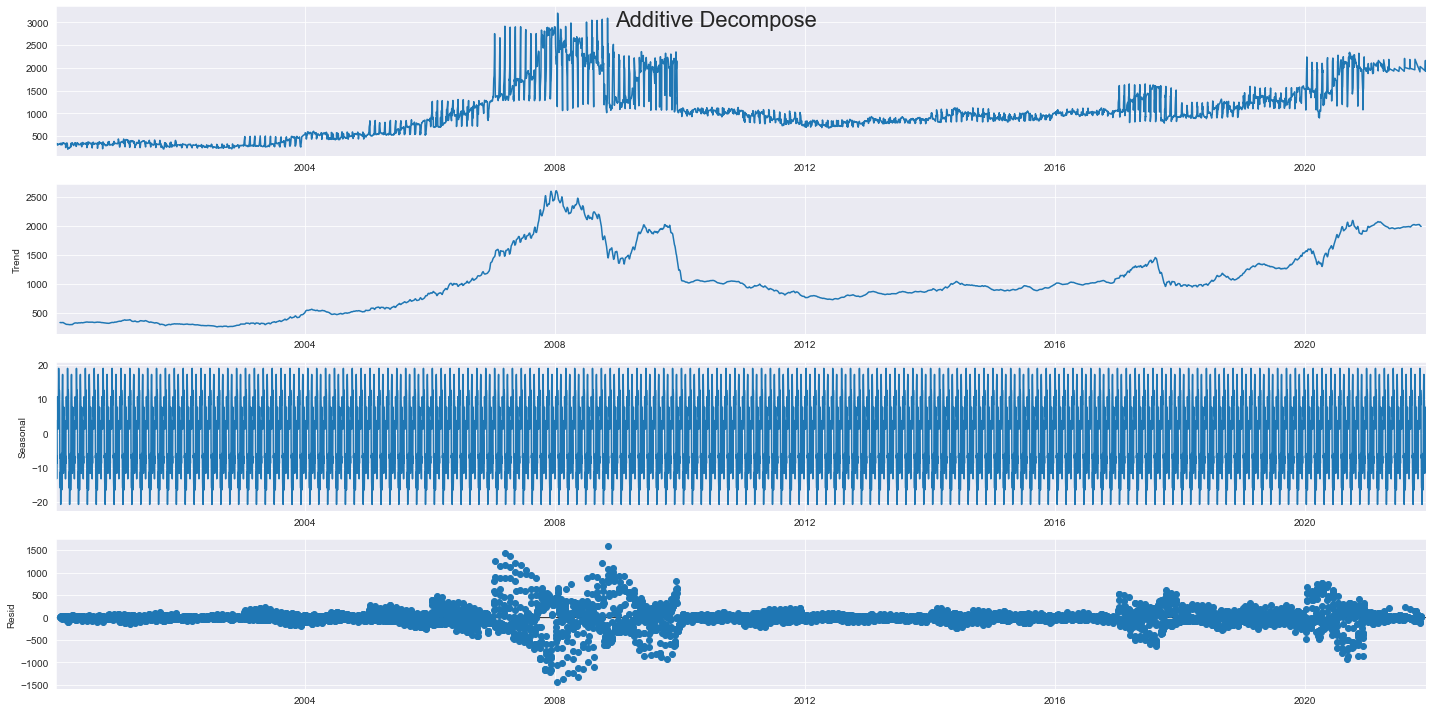

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (20,10)})
y = data['VWAP'].to_frame()


# Multiplicative Decomposition 
seasonal_decompose(y, model='multiplicative',period = 52).plot().suptitle('Multiplicative Decompose', fontsize=22)

# Additive Decomposition
seasonal_decompose(y, model='additive',period = 52).plot().suptitle('Additive Decompose', fontsize=22);

In [82]:
## stationarity 

In [83]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string(), '\n')          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the  null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        
    return out

In [84]:
adf_test(data['VWAP'],title='Reliance Stock Data');

Augmented Dickey-Fuller Test: Reliance Stock Data
ADF test statistic        -1.048390
p-value                    0.735209
# lags used               35.000000
# observations          7972.000000
critical value (1%)       -3.431171
critical value (5%)       -2.861903
critical value (10%)      -2.566963 

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


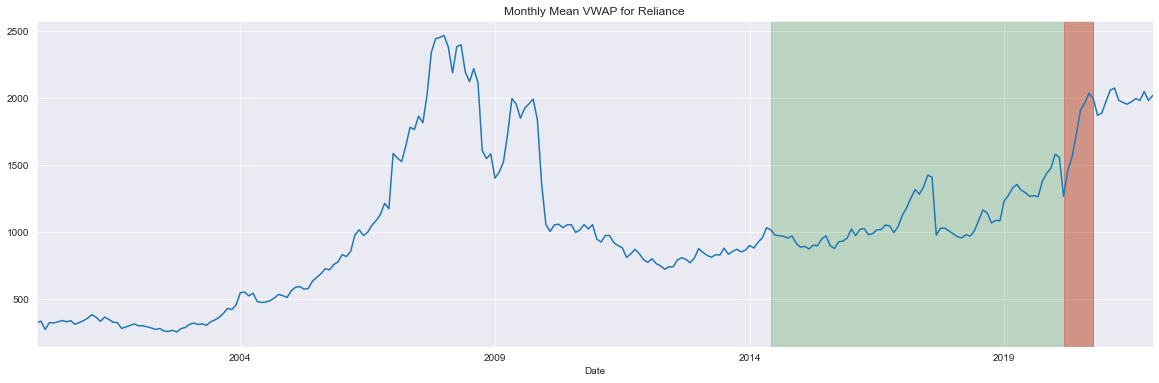

In [85]:
ax = data['VWAP'].resample('M').mean().plot.line(figsize=(20, 6))
ax.axvspan('2014-06','2020-10', color='green', alpha=0.2) # Modi Govt
ax.axvspan('2020-03','2020-10', color='red', alpha=0.3) # Covid Pandemic
ax.set_title('Monthly Mean VWAP for Reliance');


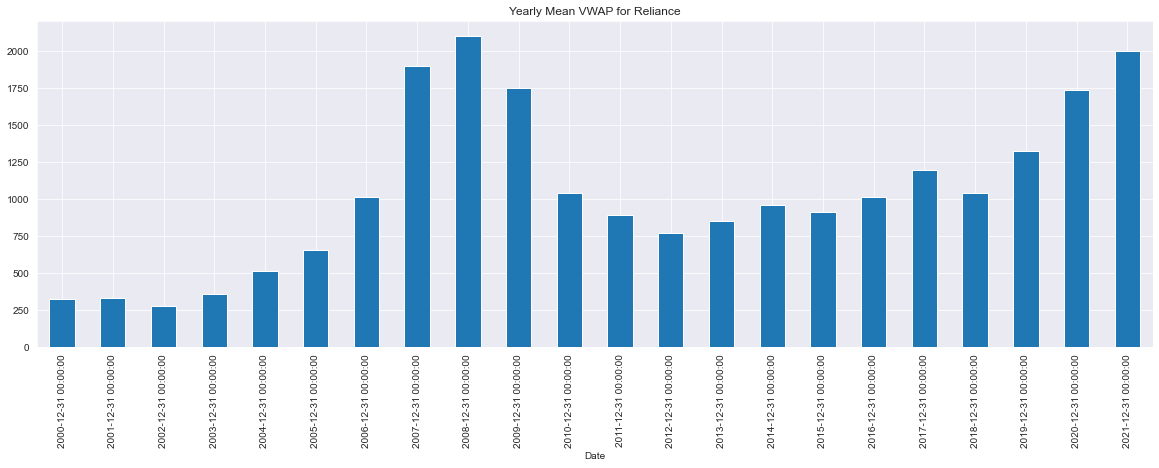

In [86]:
ax = data['VWAP'].resample('A').mean().plot.bar(figsize=(20, 6))
ax.set_title('Yearly Mean VWAP for Reliance');

In [87]:
## ACF AND PACF

In [88]:
import statsmodels.api as sm

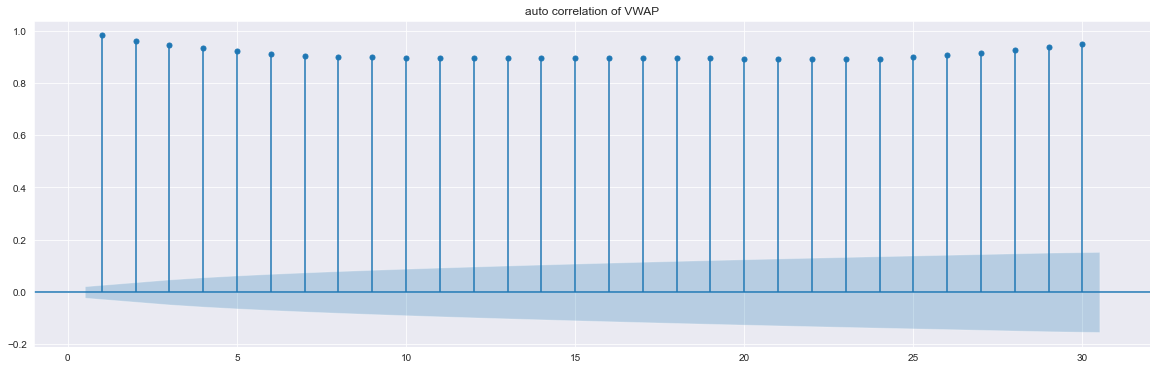

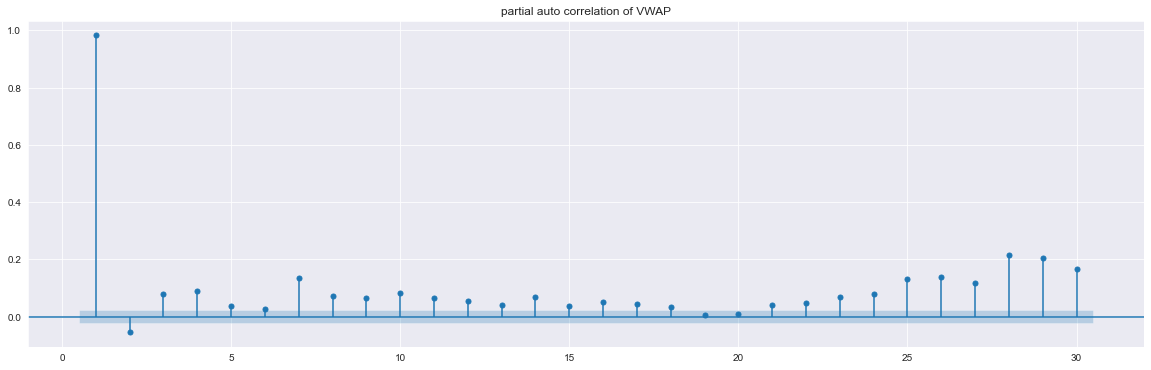

In [89]:
plt.rcParams.update({'figure.figsize': (20,6)})

sm.graphics.tsa.plot_acf(data['VWAP'], lags=30,title='auto correlation of VWAP',zero=False);
sm.graphics.tsa.plot_pacf(data['VWAP'], lags=30,title='partial auto correlation of VWAP',zero=False);

In [90]:
data = data.reset_index()
lag_features = ["Open", "High", "Low", "Close", "VWAP", "Volume"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = data[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = data[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = data[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    data[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    data[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    data[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    data[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    data[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    data[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

data.set_index("Date", drop=False, inplace=True)
data.interpolate('pad',inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

,Date,Open,High,Low,Close,VWAP,Volume,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,VWAP_mean_lag3,VWAP_mean_lag7,VWAP_mean_lag30,VWAP_std_lag3,VWAP_std_lag7,VWAP_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-02,2000-01-02,330.800000,337.45,328.000000,334.050000,334.350000,1.070780e+07,1041.344971,1040.935425,1038.626465,40.597958,66.579941,114.647987,1055.888306,1055.469360,1053.079834,40.104996,66.554893,115.590508,1025.269287,1024.861328,1022.554504,39.480488,65.273521,113.007545,1040.081299,1039.665527,1037.270996,39.993389,65.961655,114.245628,1040.573120,1040.160400,1037.803711,39.336937,65.461769,114.140182,5745295.0,5743490.5,5727972.0,1.416245e+06,1.920221e+06,2.572332e+06
2000-01-03,2000-01-03,315.000000,329.85,299.000000,316.800000,313.870000,1.076589e+07,330.799988,330.799988,330.799988,40.597958,66.579941,114.647987,337.450012,337.450012,337.450012,40.104996,66.554893,115.590508,328.000000,328.000000,328.000000,39.480488,65.273521,113.007545,334.049988,334.049988,334.049988,39.993389,65.961655,114.245628,334.350006,334.350006,334.350006,39.336937,65.461769,114.140182,10707804.0,10707804.0,10707804.0,1.416245e+06,1.920221e+06,2.572332e+06
2000-01-04,2000-01-04,324.033333,335.20,311.383333,324.266667,323.043333,8.971054e+06,322.899994,322.899994,322.899994,11.172287,11.172287,11.172287,333.649994,333.649994,333.649994,5.374012,5.374012,5.374012,313.500000,313.500000,313.500000,20.506096,20.506096,20.506096,325.424988,325.424988,325.424988,12.197592,12.197592,12.197592,324.109985,324.109985,324.109985,14.481546,14.481546,14.481546,10736846.0,10736846.0,10736846.0,4.107159e+04,4.107159e+04,4.107159e+04
2000-01-05,2000-01-05,333.066667,340.55,323.766667,331.733333,332.216667,7.176219e+06,323.277771,323.277771,323.277771,7.927052,7.927052,7.927052,334.166656,334.166656,334.166656,3.903951,3.903951,3.903951,312.794434,312.794434,312.794434,14.551406,14.551406,14.551406,325.038879,325.038879,325.038879,8.650888,8.650888,8.650888,323.754456,323.754456,323.754456,10.258502,10.258502,10.258502,10148249.0,10148249.0,10148249.0,1.019894e+06,1.019894e+06,1.019894e+06
2000-01-06,2000-01-06,342.100000,345.90,336.150000,339.200000,341.390000,5.381385e+06,324.033325,325.725006,325.725006,9.033334,8.114658,8.114658,335.200012,335.762512,335.762512,5.350000,4.510797,4.510797,311.383331,315.537506,315.537506,12.383333,13.086623,13.086623,324.266663,326.712494,326.712494,7.466667,7.816381,7.816381,323.043335,325.869995,325.869995,9.173333,9.384040,9.384040,8971054.0,9405241.0,9405241.0,1.794834e+06,1.703436e+06,1.703436e+06


In [91]:
data.Date = pd.to_datetime(data.Date, format="%Y-%m-%d")
data["month"] = data.Date.dt.month
data["week"] = data.Date.dt.week
data["day"] = data.Date.dt.day
data["day_of_week"] = data.Date.dt.dayofweek
data.head()

,Date,Open,High,Low,Close,VWAP,Volume,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,VWAP_mean_lag3,VWAP_mean_lag7,VWAP_mean_lag30,VWAP_std_lag3,VWAP_std_lag7,VWAP_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-02,2000-01-02,330.800000,337.45,328.000000,334.050000,334.350000,1.070780e+07,1041.344971,1040.935425,1038.626465,40.597958,66.579941,114.647987,1055.888306,1055.469360,1053.079834,40.104996,66.554893,115.590508,1025.269287,1024.861328,1022.554504,39.480488,65.273521,113.007545,1040.081299,1039.665527,1037.270996,39.993389,65.961655,114.245628,1040.573120,1040.160400,1037.803711,39.336937,65.461769,114.140182,5745295.0,5743490.5,5727972.0,1.416245e+06,1.920221e+06,2.572332e+06,1,52,2,6
2000-01-03,2000-01-03,315.000000,329.85,299.000000,316.800000,313.870000,1.076589e+07,330.799988,330.799988,330.799988,40.597958,66.579941,114.647987,337.450012,337.450012,337.450012,40.104996,66.554893,115.590508,328.000000,328.000000,328.000000,39.480488,65.273521,113.007545,334.049988,334.049988,334.049988,39.993389,65.961655,114.245628,334.350006,334.350006,334.350006,39.336937,65.461769,114.140182,10707804.0,10707804.0,10707804.0,1.416245e+06,1.920221e+06,2.572332e+06,1,1,3,0
2000-01-04,2000-01-04,324.033333,335.20,311.383333,324.266667,323.043333,8.971054e+06,322.899994,322.899994,322.899994,11.172287,11.172287,11.172287,333.649994,333.649994,333.649994,5.374012,5.374012,5.374012,313.500000,313.500000,313.500000,20.506096,20.506096,20.506096,325.424988,325.424988,325.424988,12.197592,12.197592,12.197592,324.109985,324.109985,324.109985,14.481546,14.481546,14.481546,10736846.0,10736846.0,10736846.0,4.107159e+04,4.107159e+04,4.107159e+04,1,1,4,1
2000-01-05,2000-01-05,333.066667,340.55,323.766667,331.733333,332.216667,7.176219e+06,323.277771,323.277771,323.277771,7.927052,7.927052,7.927052,334.166656,334.166656,334.166656,3.903951,3.903951,3.903951,312.794434,312.794434,312.794434,14.551406,14.551406,14.551406,325.038879,325.038879,325.038879,8.650888,8.650888,8.650888,323.754456,323.754456,323.754456,10.258502,10.258502,10.258502,10148249.0,10148249.0,10148249.0,1.019894e+06,1.019894e+06,1.019894e+06,1,1,5,2
2000-01-06,2000-01-06,342.100000,345.90,336.150000,339.200000,341.390000,5.381385e+06,324.033325,325.725006,325.725006,9.033334,8.114658,8.114658,335.200012,335.762512,335.762512,5.350000,4.510797,4.510797,311.383331,315.537506,315.537506,12.383333,13.086623,13.086623,324.266663,326.712494,326.712494,7.466667,7.816381,7.816381,323.043335,325.869995,325.869995,9.173333,9.384040,9.384040,8971054.0,9405241.0,9405241.0,1.794834e+06,1.703436e+06,1.703436e+06,1,1,6,3


In [92]:
exogenous_features = data.columns[7:]

In [93]:
df_train = data.loc[:"2018"]
df_valid = data.loc["2019"]

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

RMSE: 398.6590013803888
MAE: 381.99816410520646


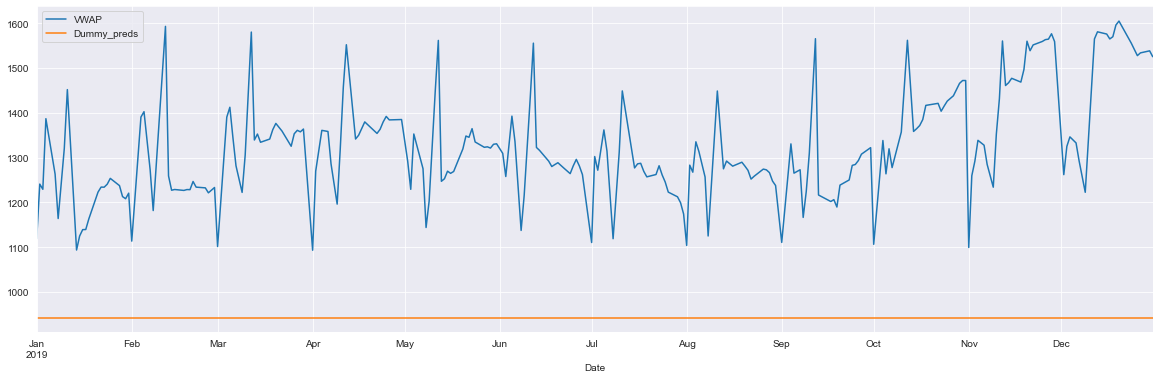

In [95]:
from sklearn.dummy import DummyRegressor

model = DummyRegressor().fit(df_train[exogenous_features], df_train['VWAP'])
df_valid['Dummy_preds'] = model.predict(df_valid[exogenous_features])
print('RMSE:', np.sqrt(mean_squared_error(df_valid['VWAP'], df_valid['Dummy_preds'])))
print('MAE:', mean_absolute_error(df_valid['VWAP'], df_valid['Dummy_preds']))
df_valid[['VWAP', 'Dummy_preds']].plot();

RMSE: 116.82568402054376
MAE: 77.22165098185549


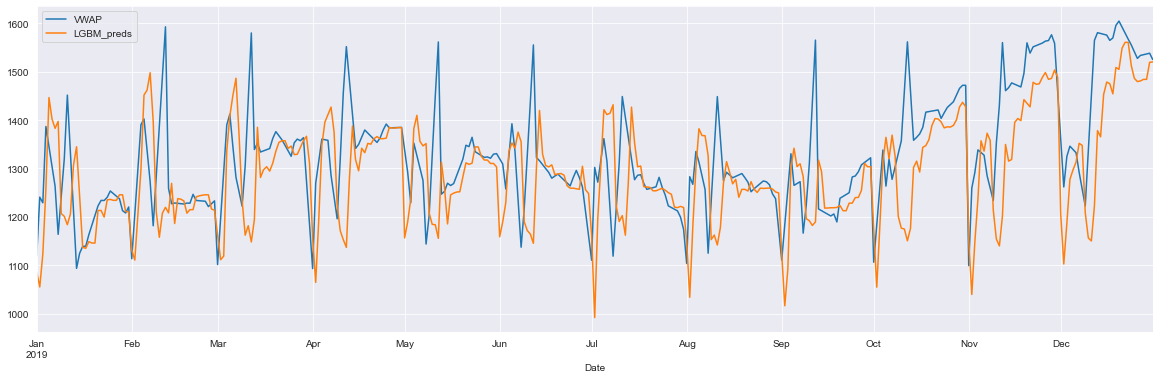

In [97]:
!pip install lightgbm
from lightgbm import LGBMRegressor

model = LGBMRegressor().fit(df_train[exogenous_features], df_train['VWAP'])
df_valid['LGBM_preds'] = model.predict(df_valid[exogenous_features])
print('RMSE:', np.sqrt(mean_squared_error(df_valid['VWAP'], df_valid['LGBM_preds'])))
print('MAE:', mean_absolute_error(df_valid['VWAP'], df_valid['LGBM_preds']))
df_valid[['VWAP', 'LGBM_preds']].plot();

In [98]:
## arima

In [99]:
!pip install pmdarima
from pmdarima import auto_arima

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=84270.946, Time=8.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=85094.872, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=85092.452, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=85091.347, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=85092.880, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=84434.874, Time=3.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=84425.553, Time=4.95 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=84429.548, Time=6.96 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=84273.283, Time=10.71 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=84558.645, Time=2.86 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=84425.102, Time=5.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=84425.467, Time=4.90 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=84411.201, Time=11.26 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=84269.103, Time=2.92 sec
 ARIMA(1,1,2)(0,0

<AxesSubplot:xlabel='Date'>

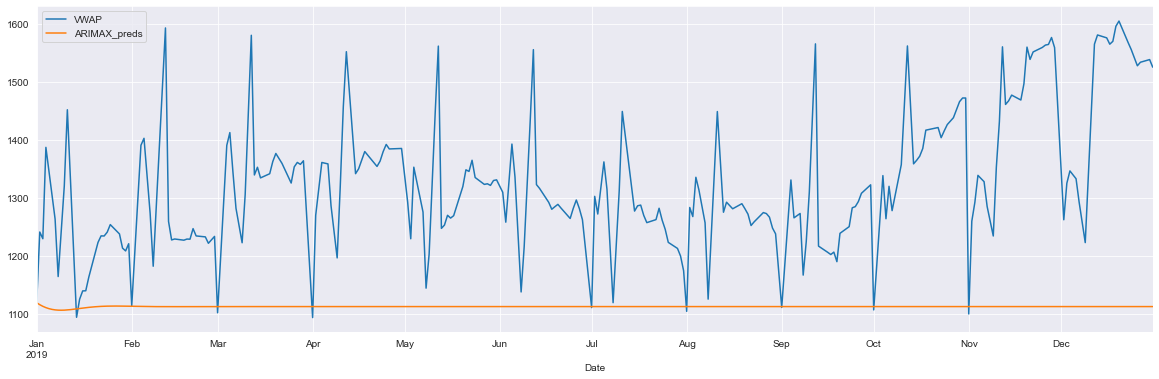

In [100]:
%%time

model = auto_arima(
    df_train.VWAP, exogenous=df_train[exogenous_features], 
    trace=True, error_action="ignore", suppress_warnings=True
).fit(df_train.VWAP, exogenous=df_train[exogenous_features])

df_valid["ARIMAX_preds"] = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])

print('RMSE:', np.sqrt(mean_squared_error(df_valid['VWAP'], df_valid['ARIMAX_preds'])))
print('MAE:', mean_absolute_error(df_valid['VWAP'], df_valid['ARIMAX_preds']))
df_valid[['VWAP', 'ARIMAX_preds']].plot();

##

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6939
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -42114.132
Date:                Wed, 02 Nov 2022   AIC                          84240.263
Time:                        02:06:53   BIC                          84281.332
Sample:                    01-02-2000   HQIC                         84254.421
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7662      0.004    397.283      0.000       1.757       1.775
ar.L2         -0.8050      0.004   -180.711      0.000      -0.814      -0.796
ma.L1         -1.8549      0.007   -279.130      0.000      -1.868      -1.842
ma.L2          0.7815      0.013     61.816      0.000       0.757       0.806
ma.L3          0.0828      0.007     12.666      0.000       0.070       0.096
sigma2      1.096e+04     49.924    219.541      0.000    1.09e+04    1.11e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            730854.11
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.50   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
## error analysis 

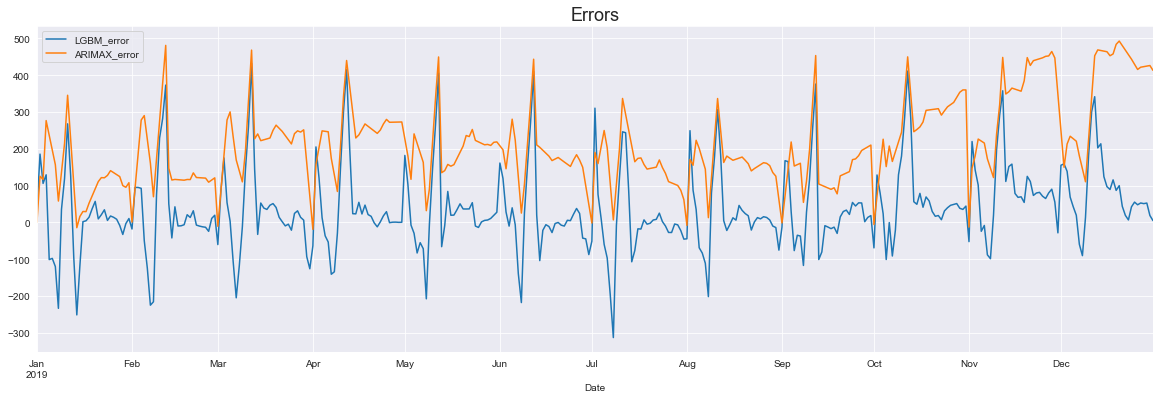

In [105]:
df_valid['ARIMAX_error'] = df_valid['VWAP'] - df_valid['ARIMAX_preds']
df_valid['LGBM_error'] = df_valid['VWAP'] - df_valid['LGBM_preds']
ax = df_valid[['LGBM_error', 'ARIMAX_error']].plot()
ax.set_title('Errors', fontsize=18);

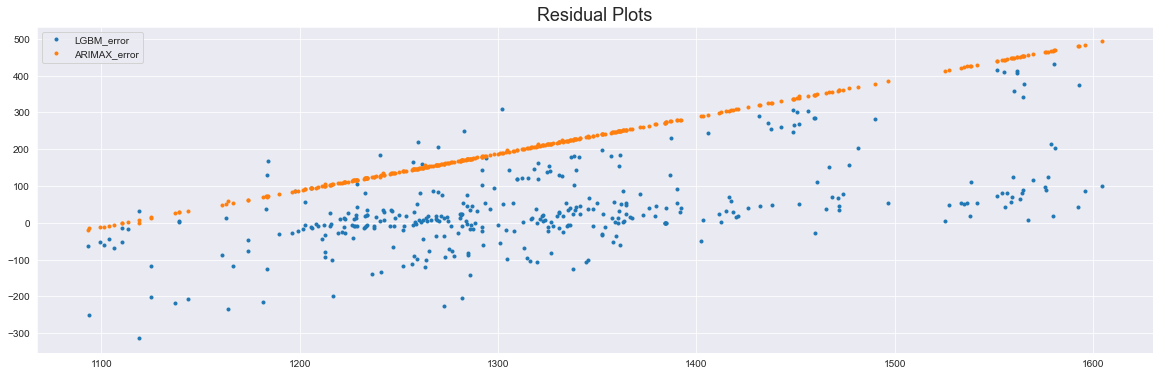

In [106]:
fig, ax = plt.subplots()
ax.plot(df_valid['VWAP'].values, df_valid['LGBM_error'].values, '.', label='LGBM_error')
ax.plot(df_valid['VWAP'].values, df_valid['ARIMAX_error'].values, '.', label='ARIMAX_error')
ax.set_title('Residual Plots', fontsize=18)
ax.legend();